In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import signal
import IPython
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF,WhiteKernel


In [16]:
# load data from the csv
X = pd.read_csv('X_binary.csv')
Y = pd.read_csv('Y_binary.csv')
X_wn = pd.read_csv('X_binary_wn.csv')
Y_wn = pd.read_csv('Y_binary_wn.csv')
X_mb = pd.read_csv('X_binary_mb.csv')
Y_mb = pd.read_csv('Y_binary_mb.csv')
X_rc = pd.read_csv('X_binary_rc.csv')
Y_rc = pd.read_csv('Y_binary_rc.csv')
X_pgd = pd.read_csv('X_binary_pgd.csv')
Y_pgd = pd.read_csv('Y_binary_pgd.csv')
X_fgm = pd.read_csv('X_binary_fgm.csv')
Y_fgm = pd.read_csv('Y_binary_fgm.csv')
# ideally will test the adversarial examples with different values of epsilon
del X['Unnamed: 0']
del Y['Unnamed: 0']
del X_wn['Unnamed: 0']
del Y_wn['Unnamed: 0']
del X_mb['Unnamed: 0']
del Y_mb['Unnamed: 0']
del X_rc['Unnamed: 0']
del Y_rc['Unnamed: 0']
del X_pgd['Unnamed: 0']
del Y_pgd['Unnamed: 0']
del X_fgm['Unnamed: 0']
del Y_fgm['Unnamed: 0']

In [5]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-3.812986,-0.286964,4.604299,35.078667,-6.615473,0.939502,-3.363581,-8.159395,-8.433389,22.234674,-12.153085,9.386999,2.894883,-6.164980,16.602814,26.416980
1,-3.538520,21.756401,1.190242,-0.082501,-3.919954,13.135556,0.702808,-2.439866,-8.694609,-3.974821,4.924358,22.575539,15.769655,19.353134,-2.912498,19.707422
2,-3.398087,17.554062,5.695118,-0.515817,-3.049484,11.932053,1.146629,8.616639,-0.788823,-1.544113,6.023301,9.956977,12.342088,16.125227,-4.858433,15.043270
3,-5.285937,16.365414,5.255232,2.469817,-3.194219,12.516466,1.657523,6.582751,-0.703856,-3.155180,5.944385,9.230529,10.916442,15.390645,-3.357585,9.171375
4,-7.467062,20.695890,5.973962,2.264019,-2.700176,12.368381,2.724877,4.911435,-0.479425,-2.112359,3.925931,10.377959,11.628291,14.323488,-5.431015,10.884117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12660,-2.053174,-3.735342,4.073953,30.534727,-4.070761,-4.117536,8.272485,-8.267244,-11.655617,23.675398,-7.085707,12.549735,-1.564403,-16.272580,19.455292,30.018140
12661,-5.176876,19.133656,0.961101,0.559277,-1.847897,11.973285,1.311990,-2.207737,-7.290162,-8.526978,6.945979,20.981182,12.284266,18.142740,-3.401537,15.686848
12662,-3.971571,24.022484,-0.743280,-0.472061,1.041926,12.644293,1.255672,-3.738207,-10.146637,-6.984230,4.035910,25.528280,12.040321,19.790577,-8.135072,23.335283
12663,-4.013367,-3.144242,4.739986,37.599250,-4.475608,-8.564102,8.730025,-9.082135,-12.438127,25.457409,-7.955079,12.951879,-0.149164,-18.352274,19.030226,33.719986


In [4]:
kernel =  RBF(1) + WhiteKernel(noise_level=.1) #first attempt at defining a kernel. Not exactly sure what will be best for this or how to tell
gpc = GaussianProcessClassifier(kernel = kernel)

In [17]:
# fit the gpc with a few datapoints at a time ? I think I can. Otherwise I can fit with all of them but it might take way too long.
x = X.to_numpy()
y = Y.to_numpy()
x_wn = X_wn.to_numpy()
y_wn = Y_wn.to_numpy()
x_mb = X_mb.to_numpy()
y_mb = Y_mb.to_numpy()
x_rc = X_rc.to_numpy()
y_rc = Y_rc.to_numpy()
x_pgd = X_pgd.to_numpy()
y_pgd = Y_pgd.to_numpy()
x_fgm = X_fgm.to_numpy()
y_fgm = Y_fgm.to_numpy()
x_small = x[:3000]
y_small = y[:3000].reshape(3000,)

In [6]:
gpc.fit(x_small, y_small)

GaussianProcessClassifier(kernel=RBF(length_scale=1) + WhiteKernel(noise_level=0.1))

In [18]:
print (gpc.score(x, y), gpc.score(x_wn, y_wn), gpc.score(x_mb, y_mb), gpc.score(x_rc,y_rc), gpc.score(x_pgd, y_pgd), gpc.score(x_fgm, y_fgm))

0.9999210422424003 0.9924200552704303 0.9973154362416108 0.6577181208053692 0.884 0.943


In [19]:
u = []
uwn = []
umb = []
urc = []
upgd = []
ufgm = []
gpc.predict_proba(x, uncertainty=u)
gpc.predict_proba(x_wn, uncertainty = uwn)
gpc.predict_proba(x_mb, uncertainty = umb)
gpc.predict_proba(x_rc, uncertainty = urc)
gpc.predict_proba(x_pgd, uncertainty = upgd)
gpc.predict_proba(x_fgm, uncertainty = ufgm)

array([[0.44158327, 0.55841673],
       [0.06832755, 0.93167245],
       [0.17857312, 0.82142688],
       ...,
       [0.38022239, 0.61977761],
       [0.13350112, 0.86649888],
       [0.08405267, 0.91594733]])

In [20]:
u = np.array(u)
uwn = np.array(uwn)
umb = np.array(umb)
urc = np.array(urc)
upgd = np.array(upgd)
ufgm = np.array(ufgm)

In [21]:
print (u.mean(), uwn.mean(), umb.mean(), urc.mean(), upgd.mean(), ufgm.mean())
# another question to explore is why rc has such low accuracy and reasonably low uncertainty still.

0.26547154618265983 0.33641428580158533 0.2371890128783516 0.3920097316459086 0.9554102290977323 0.4327473170251047


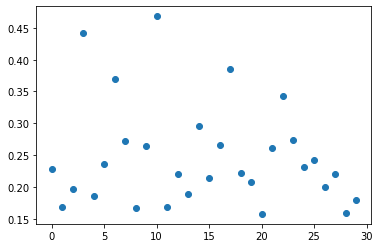

In [79]:
plt.scatter(np.arange(30), u)

In [82]:
gpc.predict(x[3000:3010])

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0])

In [83]:
y[3000:3010]

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])